In [1]:
import os
import glob
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.metrics
import seaborn as sns
#import efficientnet.tfkeras as efn
from collections import Counter
from keras_preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from keras.models import  Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D, BatchNormalization, Concatenate
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv1D, Conv2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

plt.style.use('ggplot')

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from tensorflow.keras.applications import Xception

In [4]:
xception_conv = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in xception_conv.layers:
    layer.trainable = True

for layer in xception_conv.layers:
    print(layer, layer.trainable)

model = models.Sequential()

model.add(xception_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(13, activation='softmax'))

model.summary()

83697664/83683744 [==============================] - 1s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7f1a954b2fd0> True
<keras.layers.convolutional.Conv2D object at 0x7f1a954c6fd0> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f1a95ea3710> True
<keras.layers.core.activation.Activation object at 0x7f1a95eb1c90> True
<keras.layers.convolutional.Conv2D object at 0x7f1a814249d0> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f1a80409650> True
<keras.layers.core.activation.Activation object at 0x7f1a80415490> True
<keras.layers.convolutional.SeparableConv2D object at 0x7f1a8039e050> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f1a803a2350> True
<keras.layers.core.activation.Activation object at 0x7f1a803bb250> True
<keras.layers.convolutional.SeparableConv2D object at 0x7f1a803bb9d0> True
<keras.layers.normalization.batch_normalization.BatchNormalization object a

In [5]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001, rho=0.9)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

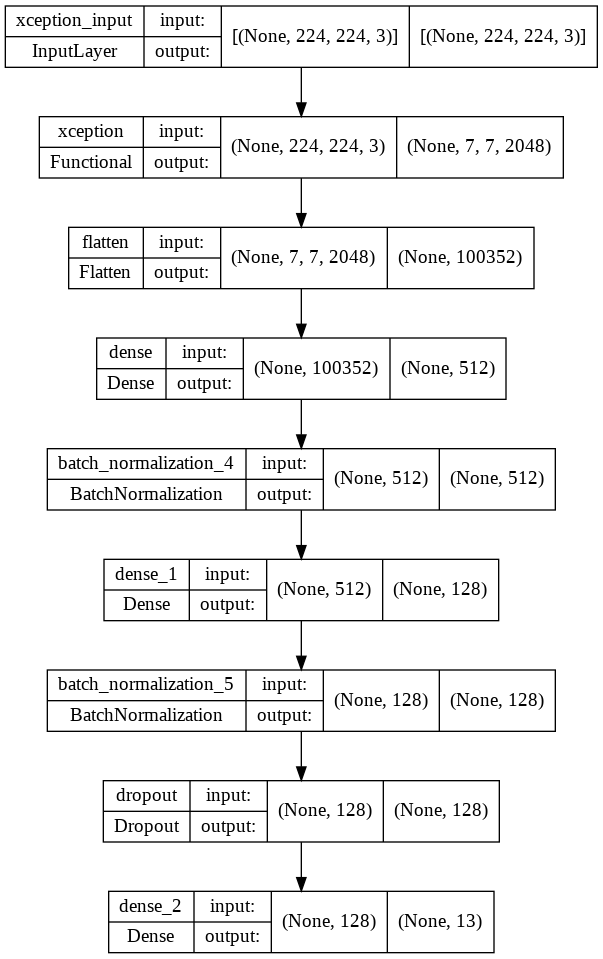

In [6]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names = True)
from IPython.display import Image
Image(filename='model.png')

In [7]:
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = False)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Birddata_split/New_8_1/train/',
                                                 target_size = (224, 224),
                                                 shuffle=True)

Found 10590 images belonging to 13 classes.


In [10]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Birddata_split/New_8_1/val/',
                                            target_size = (224, 224), shuffle=False)

Found 1303 images belonging to 13 classes.


In [11]:
for cls, idx in training_set.class_indices.items():
    print('Class nr ',idx,' -> ', cls)

Class nr  0  ->  0Capri
Class nr  1  ->  10Pachy
Class nr  2  ->  12Phyll
Class nr  3  ->  14Macro
Class nr  4  ->  1Pnoep
Class nr  5  ->  2Malac
Class nr  6  ->  3Malac
Class nr  7  ->  4Anthi
Class nr  8  ->  5Anthr
Class nr  9  ->  6Corvu
Class nr  10  ->  7Dryoc
Class nr  11  ->  8Elanu
Class nr  12  ->  9Ortho


In [12]:
model_history = model.fit(training_set, batch_size=16, epochs=10, verbose=1, validation_data=(test_set))

Epoch 1/10
331/331 [==============================] - 4533s 14s/step - loss: 1.1439 - accuracy: 0.6776 - val_loss: 0.6959 - val_accuracy: 0.8266
Epoch 2/10
331/331 [==============================] - 232s 700ms/step - loss: 0.5071 - accuracy: 0.8564 - val_loss: 0.5342 - val_accuracy: 0.8596
Epoch 3/10
331/331 [==============================] - 231s 696ms/step - loss: 0.3344 - accuracy: 0.9067 - val_loss: 0.5130 - val_accuracy: 0.8665
Epoch 4/10
331/331 [==============================] - 230s 694ms/step - loss: 0.2418 - accuracy: 0.9300 - val_loss: 0.4546 - val_accuracy: 0.8895
Epoch 5/10
331/331 [==============================] - 230s 695ms/step - loss: 0.1783 - accuracy: 0.9477 - val_loss: 0.4042 - val_accuracy: 0.8979
Epoch 6/10
331/331 [==============================] - 230s 693ms/step - loss: 0.1509 - accuracy: 0.9560 - val_loss: 0.4371 - val_accuracy: 0.8995
Epoch 7/10
331/331 [==============================] - 229s 692ms/step - loss: 0.1180 - accuracy: 0.9663 - val_loss: 0.4405 - 

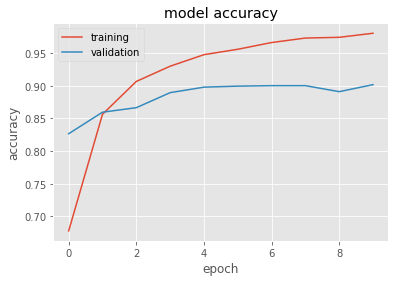

In [13]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

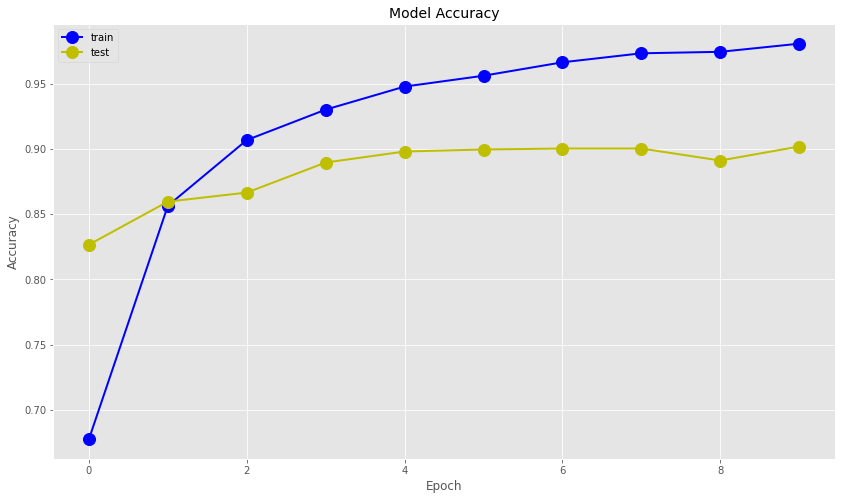

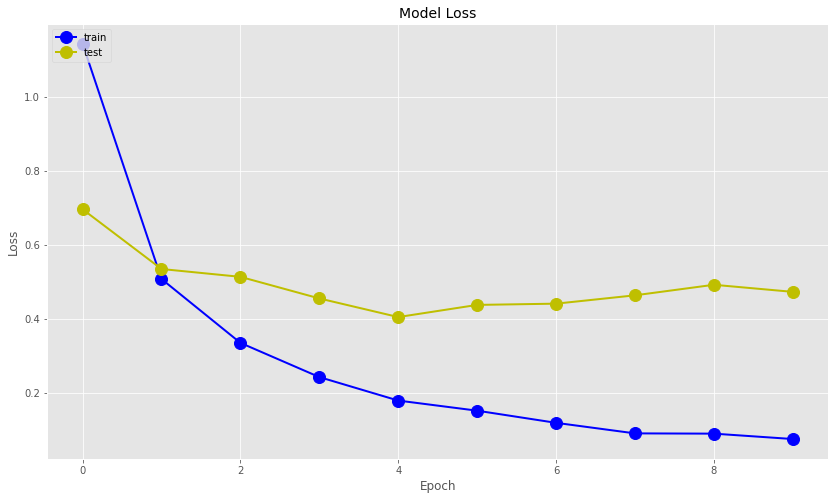

In [14]:
plt.figure(figsize=(14,8))
plt.plot(model_history.history['accuracy'], 'bo-', linewidth=2, markersize=12)
plt.plot(model_history.history['val_accuracy'], 'yo-', linewidth=2, markersize=12)
plt.title('Model Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

 # summarize history for loss
plt.figure(figsize=(14,8))
plt.plot(model_history.history['loss'], 'bo-', linewidth=2, markersize=12 )
plt.plot(model_history.history['val_loss'], 'yo-', linewidth=2, markersize=12)
plt.title('Model Loss', fontsize=14)
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
target_names = []
for key in training_set.class_indices:
  target_names.append(key)

print(target_names)

['0Capri', '10Pachy', '12Phyll', '14Macro', '1Pnoep', '2Malac', '3Malac', '4Anthi', '5Anthr', '6Corvu', '7Dryoc', '8Elanu', '9Ortho']


41/41 [==============================] - 8s 193ms/step - loss: 0.4724 - accuracy: 0.9018
n Test_Accuracy:- 0.9017651677131653
confusion matrix
[[ 70   1   3   0   2   0   0   0   0   1   1   2   0]
 [  0  44   2   2   0   1   4   0   0   1   0   0   0]
 [  2   0 270   2   1   0   0   0   1   0   0   1   0]
 [  0   0   1 173   0   0   1   0   0   2   0   6   0]
 [  0   0   2   2 140   3   0   1   0   0   0   0   0]
 [  1   1   2   0   0  49   3   0   0   2   1   0   3]
 [  0   5   3   1   0   0  64   0   0   3   3   0   1]
 [  0   0   3   0   2   0   0  35   0   0   0   0   0]
 [  1   0   1   3   0   0   0   0  37   5   1   0   0]
 [  0   1   0   0   0   0   0   5   1  61   3   0   0]
 [  0   0   1   0   0   0   1   0   6   2  39   0   9]
 [  0   0   0   0   0   0   1   0   0   0   0 137   0]
 [  0   1   3   1   0   1   2   0   0   0   0   0  56]]


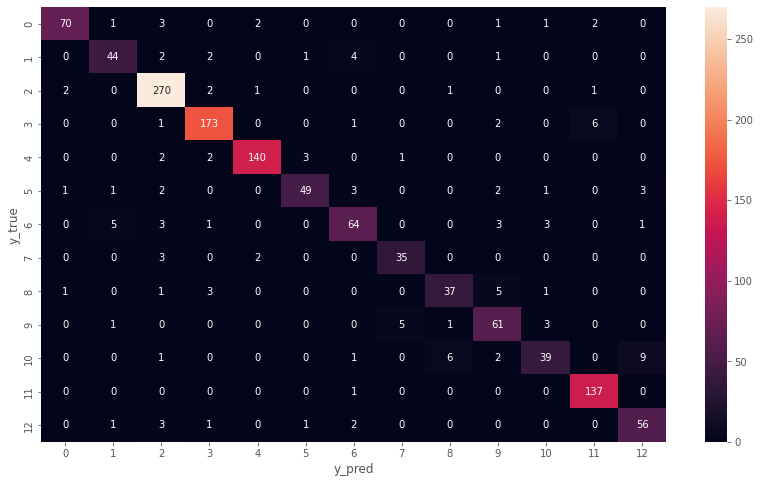

In [16]:
accuracy = model.evaluate(test_set)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model.predict(test_set)
y_pred = np.argmax(pred, axis=1)
#y_true = np.argmax(pred, axis=1)
print('confusion matrix')
print(confusion_matrix(test_set.classes, y_pred))
    #confusion matrix
f, ax = plt.subplots(figsize=(14,8))
sns.heatmap(confusion_matrix(test_set.classes, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [17]:
print('Classification Report')
print(classification_report(test_set.classes, y_pred, target_names=target_names ))

Classification Report
              precision    recall  f1-score   support

      0Capri       0.95      0.88      0.91        80
     10Pachy       0.83      0.81      0.82        54
     12Phyll       0.93      0.97      0.95       277
     14Macro       0.94      0.95      0.94       183
      1Pnoep       0.97      0.95      0.96       148
      2Malac       0.91      0.79      0.84        62
      3Malac       0.84      0.80      0.82        80
      4Anthi       0.85      0.88      0.86        40
      5Anthr       0.82      0.77      0.80        48
      6Corvu       0.79      0.86      0.82        71
      7Dryoc       0.81      0.67      0.74        58
      8Elanu       0.94      0.99      0.96       138
      9Ortho       0.81      0.88      0.84        64

    accuracy                           0.90      1303
   macro avg       0.88      0.86      0.87      1303
weighted avg       0.90      0.90      0.90      1303



In [18]:
model.save('/content/drive/MyDrive/Birddata_split/xception_rmsprop_1.hdf5')

In [19]:
finalpreds = pd.DataFrame(y_pred)
#finalpreds.columns = sub_temp.columns
finalpreds.to_csv('/content/drive/MyDrive/Birddata_split/xception_rmsprop_1.csv',index=False)

In [20]:
target_names1 = []
for key in test_set.class_indices:
  target_names1.append(key)

print(target_names1)

['0Capri', '10Pachy', '12Phyll', '14Macro', '1Pnoep', '2Malac', '3Malac', '4Anthi', '5Anthr', '6Corvu', '7Dryoc', '8Elanu', '9Ortho']


ROC AUC score: 0.9262626595545593


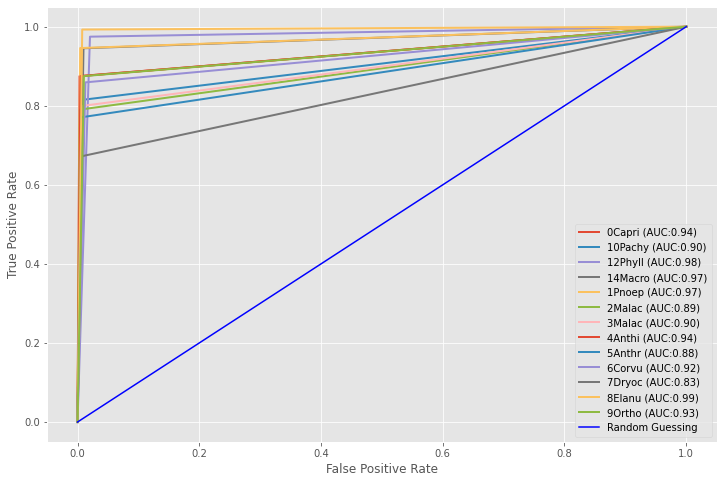

In [21]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_preds, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_preds = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target_names1):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_preds[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)),linewidth=2)
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_preds, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(test_set.classes, pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [22]:
top_k_accuracy_score(test_set.classes, pred, k=5)

0.9762087490406753

In [23]:
top_k_accuracy_score(test_set.classes, pred, k=5, normalize=False)

1272

In [24]:
top_k_accuracy_score(test_set.classes, pred, k=1)

0.9017651573292402

In [25]:
top_k_accuracy_score(test_set.classes, pred, k=1, normalize=False)

1175